In [6]:
sample_type = 'data'

# LHCb data sample of $B \to D^{*-}\left(D^{0} \to K^- \pi^+ \pi^+ \pi^-  \right)(X)$ Background

A fit to the $m(K\pi\pi\pi)$ invariant mass in `data` is performed in order to
1. Compute the $_s$Weights associated to the $D^{0} \to K^- \pi^+ \pi^+ \pi^-$ peak. The MC fit previously performed might be used to help to fit to converge (if needed).
2. Ultimately, this will be used to compare $D^0\to K^- \pi^+ \pi^+ \pi^-$ peak in MC to the $_s$Weighted LHCb data peak.


**Model**: 
- The $D^+$ peak in $m(K\pi\pi)$ is modeled by a double CB
- The background is modeled by an exponential

In [7]:
import sys
sys.path.insert(0, '..')
from definition import (
    data_names,
    limits_m_Kpipipi,
    MC_description,
    branch,
    columns,
    latex_decay,
    colors,
)

sample_name = data_names[sample_type]
MC_name = data_names['MC']
low = limits_m_Kpipipi[sample_type]['low']
high = limits_m_Kpipipi[sample_type]['high']

print("data name: ", sample_name)
print("MC name: ", MC_name)
print("branch: ", branch)
print("low: ", low)
print("high: ", high)


# used to change the name of the parameters in order to 
# be able to recreate zfit parameters with different names.
num = 0 


data name:  BTODstD0X
MC name:  BTODstD0X_MC
branch:  m_Kpipipi
low:  1775
high:  1950


In [8]:
# python libraries
import zfit

# bd2dsttaunu
from bd2dsttaunu.locations import loc
from bd2dsttaunu.definition import m_D0_PDG

# HEA library
import HEA.fit.fit
from HEA.fit.fit import sum_crystalball_or_gaussian

from HEA.plot import plot_hist_auto, plot_hist, save_fig
from HEA.plot.fit import plot_hist_fit_auto
from HEA import load_dataframe
from HEA.plot.tools import draw_vline
from HEA.fit import retrieve_params


from HEA.definition import latex_params

Welcome to JupyROOT 6.22/06


## Read the dataframe

In [9]:
df = load_dataframe(loc.B2DstDplusX_list, tree_name='DecayTreeTuple/DecayTree', columns=columns)

Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_12_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_15_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_16_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_17_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_18_up_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_11_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_12_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_15_down_final_ds_selection.root
Loading /data/lhcb/users/scantlebury-smead/angular_analysis/data/data_16_down_final_ds_selecti

## Plot

### Full range

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X/m_Kpipipi_full


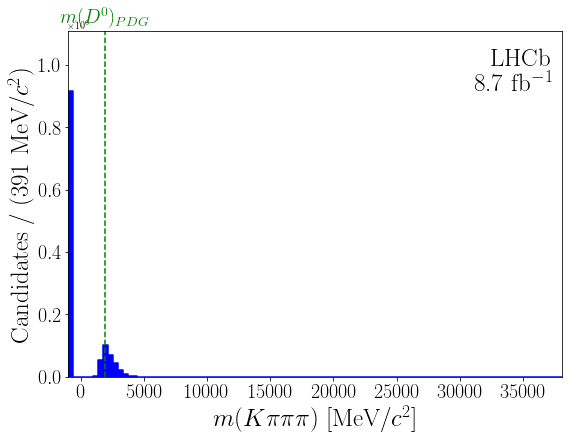

In [10]:
fig, ax = plot_hist_auto({sample_type: df}, 
                         branch,
                         bar_mode=True, 
                         colors = ['b'],
                         save_fig=False,
                         pos_text_LHC={'ha':'right'})

draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', color='g', ls='--')
save_fig(fig, branch+'_full', folder_name=sample_name)

### Fit range

In [11]:
df = df.query(f'{branch} > {low} and {branch} < {high}')

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X/m_Kpipipi


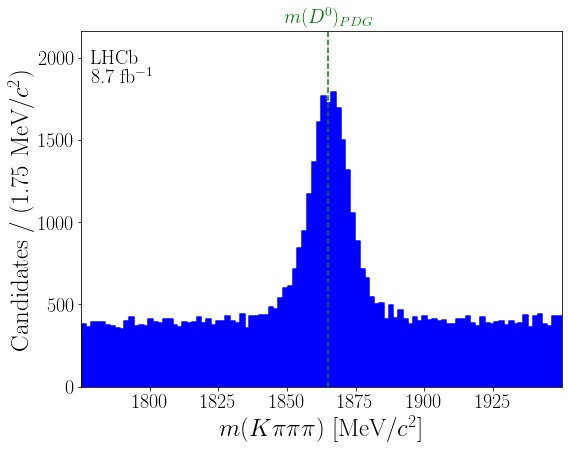

In [12]:
fig, ax = plot_hist_auto({sample_type: df}, 
                         branch,
                         bar_mode=True, 
                         colors = ['b'],
                         save_fig=False,
                         pos_text_LHC={'ha':'left', 'fontsize':20})

draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', color='g', ls='--')
save_fig(fig, branch, folder_name=sample_name)

## Fit to $m(K\pi\pi\pi)$

We try to models for the signal:
1. Double CB
2. Sum of two CB with power tails in opposite sides

### Retrieve MC fit

In [13]:
MC_params = retrieve_params(MC_name, MC_name)

### Parameters

In [14]:
n_events = len(df)
print(n_events)

54368


#### Signal = CB

HESSE  not pos. def.

In [142]:
# initial_values_signal = {
#     'mu': {
#         'value' : 1866,
#         'low': m_D0_PDG-5.,
#         'high': m_D0_PDG+5.,     
#     },
#     'sigma': {
#         'value' : 5.,
#         'low': 1.,
#         'high': 15.,     
#     },
#     'alphaL': {
#         'value' : 1.,
#         'low': 0.1,
#         'high': 10.,     
#     },
#     'nL': {
#         'value' : 140.,
#         'low': 0.1,
#         'high': 200., 
#     }
# }

#### Signal = double CB

```
Number of bins: 87
Width of the bins: 2.01149425287349

Number of d.o.f. in the model:  9
Reduced chi2:  1.0162320553759792

Mean of the normalised residuals: -0.018313828267844702
Std of the normalised residuals: 0.9543422892577607
```

In [178]:
initial_values_signal = {
    'mu': {
        'value' : 1866,
        'low': m_D0_PDG-5.,
        'high': m_D0_PDG+5.,     
    },
    'sigma': {
        'value' : 5.,
        'low': 1.,
        'high': 10.,     
    },
    'alphaL': {
        'value' : 1.,
        'low': 0.1,
        'high': 10.,     
    },
    'alphaR': {
        'value' : 1.,
        'low': 0.1,
        'high': 40.,     
    },
    'nL': {
        'value' : 1.,
        'low': 0.1,
        'high': 10., 
    },
    'nR': {
        'value' : 1.,
        'low': .1,
        'high': 10., 
    }
}

#### Signal = Sum of two CB with tails in opposite sides

Result
```
Number of bins: 87
Width of the bins: 2.01149425287349

Number of d.o.f. in the model:  10
Reduced chi2:  1.0278989129047251

Mean of the normalised residuals: -0.017786459364913743
Std of the normalised residuals: 0.9536420997597101
```

In [185]:
# initial_values_signal = {
#     'mu': {
#         'value' : MC_params['mu'],
#         'low': m_D0_PDG-5.,
#         'high': m_D0_PDG+5.,     
#     },
#     'sigma': {
#         'value' : MC_params['sigma'],
#         'low': 1.,
#         'high': 15.,     
#     },
#     'alphaL': {
#         'value' : MC_params['alphaL'],
#         'low': 0.1,
#         'high': 10.,     
#     },
#     'alphaR': {
#         'value' : MC_params['alphaR'],
#         'low': -10.,
#         'high': -0.1,     
#     },
#     'nL': {
#         'value' : MC_params['nL'],
#         'low': 0.1,
#         'high': 20., 
#     },
#     'nR': {
#         'value' : 1.,
#         'low': .1,
#         'high': 10., 
#     },
#     'frac': {
#         'value' : MC_params['frac'],
#         'low': 0.1,
#         'high': 1.,     
#     },
# }


#### Background

In [186]:
initial_values_background = {
    'n_bkg': {
        'value' : n_events*2/3,
        'low': 0,
        'high': n_events,  
    },
    'n_sig': {
        'value' : n_events*1/3,
        'low': 0,
        'high': n_events,  
    },
    'lambda': {
        'value' : -0.01,
        'low': -0.1,
        'high': 1e-20
    }
}


initial_values = {**initial_values_signal, **initial_values_background}

### zFit Parameters

In [191]:
obs = zfit.Space("x", limits=(low, high))
num += 1
zparams = HEA.fit.fit.define_zparams(initial_values, num=num)

### zFit models and data

In [196]:
# model_S = zfit.pdf.CrystalBall(zparams['mu'], zparams['sigma'], 
#                                 zparams['alphaL'],
#                                 zparams['nL'],
#                                 obs=obs)


model_S = zfit.pdf.DoubleCB(zparams['mu'], zparams['sigma'], 
                             zparams['alphaL'], zparams['alphaR'], 
                             zparams['nL'], zparams['nR'], obs=obs)


# model_S, crystalBallL_S, crystalBallR_S = sum_crystalball_or_gaussian(zparams['mu'], zparams['mu'],
#                                                                       zparams['sigma'], zparams['sigma'],
#                                                                       zparams['frac'], obs,                                                          
#                                                                       zparams['alphaL'], zparams['alphaR'], 
#                                                                       zparams['nL'], zparams['nR']
#                                                                      )

exponential = zfit.pdf.Exponential(zparams["lambda"], obs=obs)

model_S_ext = model_S.create_extended(zparams["n_sig"])
exp_ext = exponential.create_extended(zparams["n_bkg"])
model = zfit.pdf.SumPDF([model_S_ext, exp_ext])

data = zfit.Data.from_pandas(df[branch], obs=obs)

### Fit

In [197]:
import numpy as np
def wiggle_zparameters(zparams, params):
    """ Randomly wiggle the zParameters 
    within their uncertainty interval
    
    Parameters
    ----------
    zparams        : dict[str, zfit.Parameter]
        Dictionnary of zfit Parameters 
        whose keys are the name of the variables
    params        : dict[zfit.zfitParameter, float]
        Result ``'result.params'`` of the minimisation 
        of the loss function 
        (given by :py:func:`launch_fit`)
    """
    
    for param in zparams.keys():
        zparam = zparams[param]
        value = params[zparam]['value']
        error = params[zparam]['minuit_hesse']['error']
        
        zparams[param].set_value(np.random.normal(loc=value, scale=error))    

In [200]:
result, params = HEA.fit.fit.launch_fit(model, data, extended=True)
wiggle_zparameters(zparams, params)
result, params = HEA.fit.fit.launch_fit(model, data, extended=True)
wiggle_zparameters(zparams, params)
result, params = HEA.fit.fit.launch_fit(model, data, extended=True)

┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = -2.655e+05                 │        Nfcn = 243 (243 total)        │
│ EDM = 0.00122 (Goal: 0.001)      │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │       SOME Parameters at limit       │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
Time to do the fit:  4.349936704151332
name            value    minuit_hesse    at limit
---------  ----------  --------------  ----------
n_sig;21        15360     +/- 2.5e+02       False
n_bkg;21        39000     +/-   3e+02       False
a

Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: iterations finish without convergence.
Info in VariableMetricBuilder : edm = 0.0197391
Info in             requested : edmval = 0.001
Info: VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
Info in Edm is smaller than machine accuracy : machineLimit = 0.0158234
Info in Current  Edm is : edm = 0.0012232
Info in Required Edm is : edmval = 0.001
Info: VariableMetricBuilder: Edm has been re-computed after Hesse
Info in new value is now smaller than the required tolerance, : edm = 0.0012232
Info: VariableMetricBuilder: no improvement in line search
Info: VariableMetricBuilder: machine accuracy limits further improvement.
Info: VariableMetricBuilder: Stop the minimization - reached machine accuracy limit
Info in Edm is smaller than machine accuracy : machineLimit = 0.0158234
Info in Current  Edm is : edm = 0.00176417
Info in Required Edm is : edmval = 0.001
Info: DavidonErrorUp

In [201]:
assert HEA.fit.fit.check_fit(result)

### Plot the result of the fit

In [202]:
bin_width = 2
n_bins = int(round(high - low) / bin_width)
print(n_bins)

87


Number of bins: 87
Width of the bins: 2.01149425287349

Number of d.o.f. in the model:  9
Reduced chi2:  1.0162320553759792

Mean of the normalised residuals: -0.018313828267844702
Std of the normalised residuals: 0.9543422892577607
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X/m_Kpipipi_fit


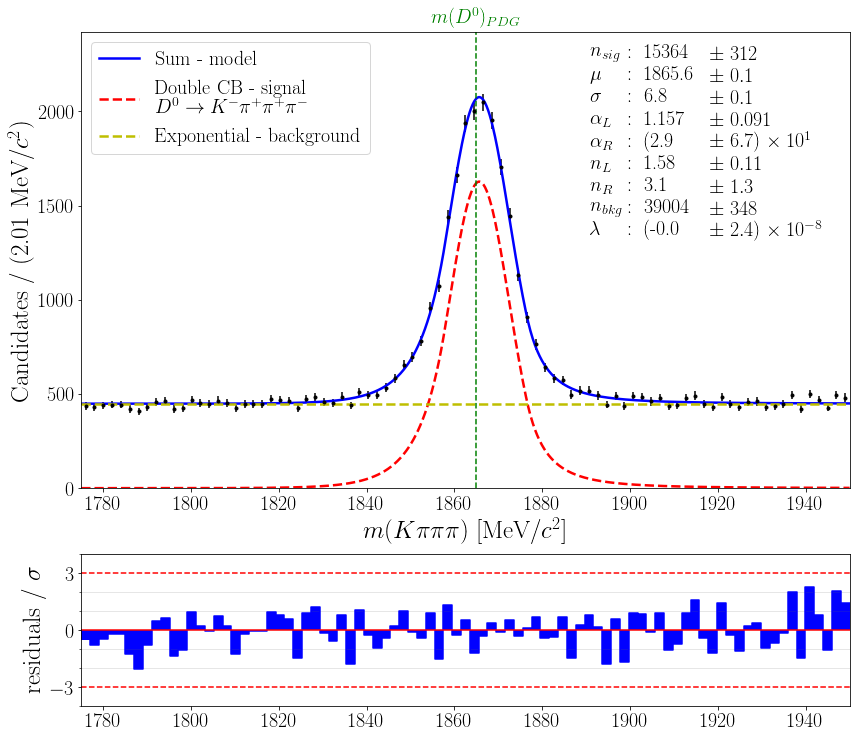

In [155]:
fig, ax, _ = plot_hist_fit_auto(df, branch, 
                             models = [model, model_S_ext, exp_ext], 
                             models_names = ["", f'\n {latex_decay}',''], 
                             colors = ['b','r','y'], n_bins=n_bins,
                             obs=obs,
                             params=params, latex_params=latex_params, 
                             fontsize_leg=20., save_fig=False,
                                fontsize_res=20, colWidths=[0.035, 0.01, 0.05, 0.12],
                            )

# fig, ax, _ = plot_hist_fit_auto(df, branch, 
#                              models = [model, 
#                                        [model_S_ext, crystalBallL_S, crystalBallR_S], 
#                                        exp_ext], 
#                              models_names = ["", f'\n {latex_decay}',''], 
#                              colors = ['b', colors[sample_type], colors['bkg']], n_bins=n_bins,
#                              obs=obs, 
#                              params=params, latex_params=latex_params, 
#                              fontsize_leg=20., save_fig=False,
#                                 fontsize_res=20, colWidths=[0.035, 0.01, 0.05, 0.12],
#                             )



draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', ls='--', color='g')


save_fig(fig, 'm_Kpipipi_fit', folder_name=sample_name)

Number of bins: 87
Width of the bins: 2.01149425287349

Number of d.o.f. in the model:  9
Reduced chi2:  1.0160429762829755

Mean of the normalised residuals: -0.018188783214839972
Std of the normalised residuals: 0.9542558620987873
Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X/m_Kpipipi_fit


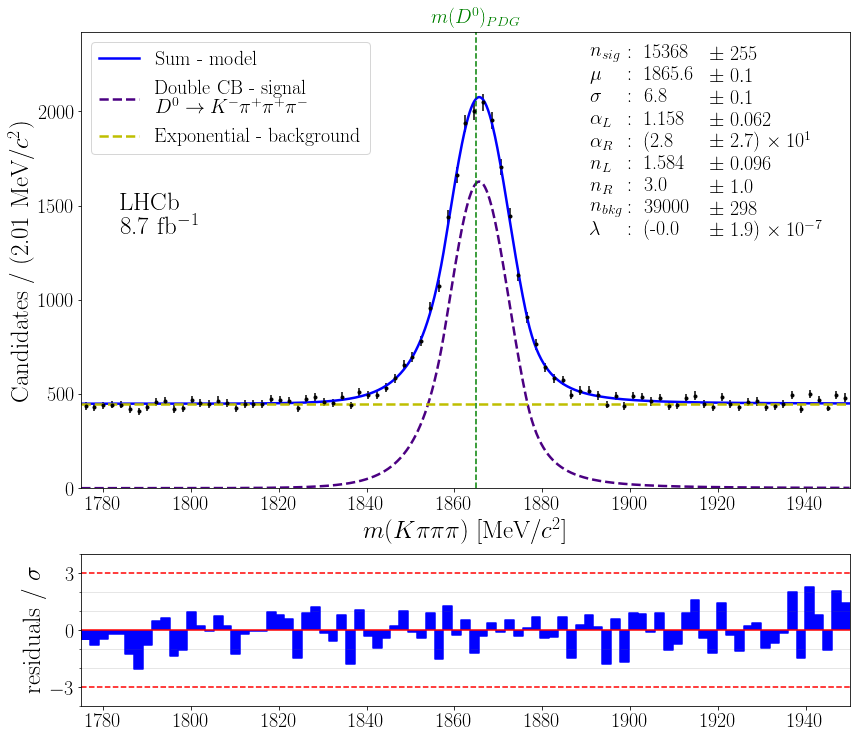

In [203]:
fig, ax, _ = plot_hist_fit_auto(df, branch, 
                                models = [model, model_S_ext,
                                           exp_ext], 
                                models_names = ["", f'\n {latex_decay}', ""], 
                                colors = ['b', colors[sample_type], colors['bkg']], 
                                n_bins=n_bins,
                                obs=obs, 
                                params=params, latex_params=latex_params, 
                                fontsize_leg=20., save_fig=False,
                                fontsize_res=20, colWidths=[0.035, 0.01, 0.05, 0.12],
                                pos_text_LHC={'ha':'left', 
                                              'x': 0.05, 'y': 0.65}
                               )

draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', ls='--', color='g')
save_fig(fig, 'm_Kpipipi_fit', folder_name=sample_name)

### Save the fit result

In [157]:
HEA.fit.fit.save_params(params, sample_name, True, folder_name=sample_name, remove=f';{num}')

Json file saved in /home/correiaa/bd2dsttaunu/output/json/BTODstD0X/BTODstD0X_params.json


In [158]:
HEA.fit.params.json_to_latex_table(sample_name, sample_name, latex_params)

Latex table in /home/correiaa/bd2dsttaunu/output/tables/BTODstD0X/BTODstD0X_params.tex
\begin{tabular}[t]{lc}
\hline
Variable &Fitted Value\\
\hline\hline
$n_{sig}$&$15364\pm312$\\
\hline
$\mu$&$1865.6\pm0.1$\\
\hline
$\sigma$&$6.8\pm0.1$\\
\hline
$\alpha_L$&$1.157\pm0.091$\\
\hline
$\alpha_R$&$(2.9\pm6.7)\times 10^{1}$\\
\hline
$n_L$&$1.58\pm0.11$\\
\hline
$n_R$&$3.1\pm1.3$\\
\hline
$n_{bkg}$&$39004\pm348$\\
\hline
$\lambda$&$(-0.0\pm2.4)\times 10^{-8}$\\
\hline
\end{tabular}


## Compute the $_s$Weight

### Libraries

In [159]:
from hepstats.splot import compute_sweights
import HEA.plot.tools as pt
import matplotlib.pyplot as plt
from HEA.plot.line import plot_lines_auto
from HEA.pandas_root import save_root

from HEA import RVariable

### Compute $_s$Weights

In [160]:
weights = compute_sweights(model, data)

In [161]:
weights_dict = {}
weights_dict['sig'] = weights[zparams['n_sig']]
weights_dict['bkg'] = weights[zparams['n_bkg']]

mass = df[branch]

### Plot $_s$Weights

Figure saved in /home/correiaa/bd2dsttaunu/output/plots//BTODstD0X/sWeights


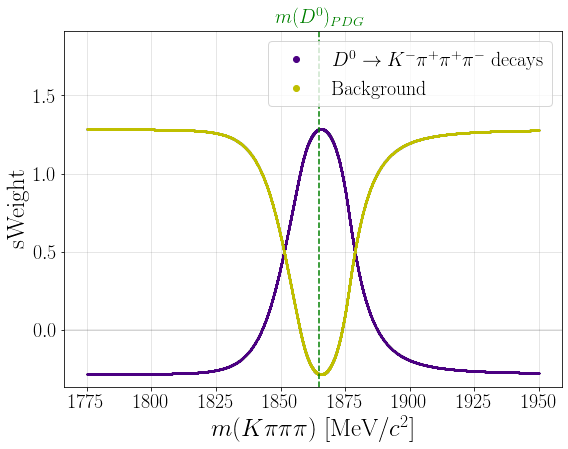

In [162]:
fig, ax = plot_lines_auto(x=mass,
                         y=[weights_dict['sig'], weights_dict['bkg']],
                         name_x='m_Kpipipi',
                         ylabel='sWeight',
                         names_y=[f'{latex_decay} decays', 'Background'], 
                         colors=[colors[sample_type], colors['bkg']],
                         linestyle='', factor_ymax=1.4,
                         rasterized=True, 
                         save_fig=False)

ax.axhline(0, c='black', ls='-', alpha=0.1)
draw_vline(ax, m_D0_PDG, '$m(D^0)_{PDG}$', ls='--', color='g')

save_fig(fig, 'sWeights', folder_name=sample_name)

### Save $_s$Weights

In [163]:
df['sWeight'] = weights_dict['sig']
df['sWeight_bkg'] = weights_dict['bkg']

In [164]:
df.columns

Index(['m_Kpipipi', 'q2_reco', 'isolation_bdt', 'tau_life_reco', 'm_DstKpipi',
       'theta_X_reco', 'theta_L_reco', 'chi_reco', 'costheta_X_reco',
       'costheta_L_reco', 'coschi_reco', 'tau_M', 'B0_M', 'sWeight',
       'sWeight_bkg'],
      dtype='object')

In [165]:
save_root(df, sample_name + '_with_sWeights', 'DecayTree', folder_name=sample_name)

Root file saved in /home/correiaa/bd2dsttaunu/output/root/BTODstD0X/BTODstD0X_with_sWeights.root
